# Coding Assignment : Rocket Flight #

**Arnaud RUEFF & Antonin URRUTY**<br /><br />

The altitude *h* and speed *v* of the rocket are given by :

\begin{align} \frac{dh}{dt} &= v\\ (m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D \end{align}

The mass of the remaining propellant is given by : <br /> <br /> 
$ m_p = m_{po} - \int^t_0 \dot{m}_p d\tau $ <br /><br />
where $\dot{m}_p$ is is the time-varying burn rate.  <br /><br />
====> The figure shows us that $\dot{m}_p$ is **constant** at a rate of **20Kg/s for 5 seconds**, and then instantly vanishes (the propellant is totally consumed) <br /><br />

# Python Script

*"Using Euler's method with a timestep of Δt=0.1s, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down."*

#### Importing libraries and declaration of variables

In [52]:
import numpy 
import matplotlib.pyplot as pyplot

h = 0
ms = 50        # in Kg
g = -9.81      # in m/s2
rho = 1.091    # kg/m3 
PI = numpy.pi
A = PI*(0.5)**2
ve = 325       # m/s
Cd = 0.15
mpo = 100      # Kg at time t=0

#### Mass of remaining propellant

In [53]:
def mpdot(t):  # burn rate in Kg/s. Valid for 5s, then 0 (when all the propellant is consumed)
    if t >= 5 :
        mpd = 0.
    else :
        mpd = 20.
    return mpd 

# We define a function for the remaining propellant, dependant on time :
def mp(t):
    if t > 5:
        mp = 0.
    elif t < 0:        
        print("please use t>=0")
    else:
        mp = mpo - mpdot(t)*t  #we directly developped the integral, as mpdot is constant when t < 5s
    return mp

### Euler's method

In [54]:
dt = 0.1
t_max = 40.0

R=numpy.zeros((3, int(t_max/dt)))
T=numpy.linspace(0, 40, int(t_max/dt))
n=0
R[0,0]=0     # Speed : v
R[1,0]=0     # Height: h
R[2,0]=100   # mass of remaining propellant at t=0

print("Values of n, v, h, mp, t :")

for n in range(372):
    R[2,n]=mp(T[n])      # Works better when into the loop, couldn't find out why.
    
    #Euler method for v
    R[0,n+1] = R[0,n] + dt*g+dt*(mpdot(T[n])*ve-0.5*rho*R[0,n]*numpy.abs(R[0,n])*A*Cd)/(ms+R[2,n])  
    
    #Euler method for h
    R[1,n+1] = R[1,n] + dt*R[0,n]    
    
    print(n,R[0,n],R[1,n],R[2,n],T[n]) #prints the value of n, v, h, mp, t as previously announced 
    

Values of n, v, h, mp, t :
0 0.0 0.0 100.0 0.0
1 3.35233333333 0.0 97.9949874687 0.100250626566
2 6.76288597297 0.335233333333 95.9899749373 0.200501253133
3 10.2322331486 1.01152193063 93.984962406 0.300751879699
4 13.7609204207 2.03474524549 91.9799498747 0.401002506266
5 17.3494603862 3.41083728756 89.9749373434 0.501253132832
6 20.9983291711 5.14578332617 87.969924812 0.601503759398
7 24.7079627009 7.24561624328 85.9649122807 0.701754385965
8 28.4787527397 9.71641251337 83.9598997494 0.802005012531
9 32.3110426882 12.5642877873 81.954887218 0.902255639098
10 36.2051231329 15.7953920562 79.9498746867 1.00250626566
11 40.161227137 19.4159043694 77.9448621554 1.10275689223
12 44.1795252648 23.4320270832 75.9398496241 1.2030075188
13 48.2601203322 27.8499796096 73.9348370927 1.30325814536
14 52.403041876 32.6759916428 71.9298245614 1.40350877193
15 56.6082403361 37.9162958304 69.9248120301 1.5037593985
16 60.8755809446 43.5771198641 67.9197994987 1.60401002506
17 65.2048373177 49.66467

#### Maximum and minimum values :

In [56]:
   
hmax = numpy.amax(R[1,:])
hmax_n = numpy.argmax(R[1,:])
print("---------------------------")
print("Maximum height (m) :", hmax)
print("Time to reach maximum height (s) :" ,dt*hmax_n)


vmax = numpy.amax(R[0,:])
vmax_n = numpy.argmax(R[0,:])
print("---------------------------")
print("Maximum speed (m/s) :", vmax)
print("Time to reach maximum speed (s) :", dt*vmax_n)
print("Height at maximum speed (m) :",R[1, vmax_n])
print("---------------------------")

print("Time when crashing to the ground ",T[371])
print("Speed when crashing to the ground ",R[0,371])
print("---------------------------")

---------------------------
Maximum height (m) : 1335.5921032
Time to reach maximum height (s) : 15.7
---------------------------
Maximum speed (m/s) : 232.426493439
Time to reach maximum speed (s) : 5.0
Height at maximum speed (m) : 524.005354557
---------------------------
Time when crashing to the ground  37.1929824561
Speed when crashing to the ground  -86.0056343763
---------------------------


### Graphics 

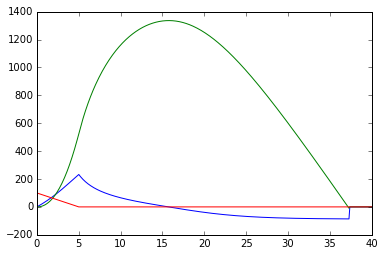

In [58]:
%matplotlib inline
pyplot.plot(T[:], R[0,:]) # Speed, in blue on the graph
pyplot.plot(T[:], R[1,:]) # Height, in green on the graph
pyplot.plot(T[:], R[2,:]) # Mass of the remaining propellant, in red on the graph

pyplot.show()



#### Comments :

* We found out while defining the array for t (T) that the function numpy.empty would return a wrong value of 'maximum height' and 'maximum speed' for an unknown reason. After a lot of research and tries/mistakes, this problem was solved by replacing this function by T=numpy.linspace(0, 40, int(t_max/dt)).  

